## Welcome!! Thanks for looking into my notebook. :) :) 

### Titanic Dataset
I'm a newbie to Python, Pandas, Numpy, Data Science, Machine Learning algorithms. Started learning 5 weeks ago. This is my first Kaggle competition submission. 

Looking forward to learn more through Kaggle platform :) 

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing datasets to the dataframe 
train_df =  pd.read_csv("Data/titanic_train.csv")
test_df =  pd.read_csv("Data/titanic_test.csv")

In [4]:
#let's look at the basic structure and data of the training dataframe 

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#let's look at the basic structure and data of the test dataframe
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#getting to know about the size of the training data

train_df.shape

(891, 12)

In [7]:
#getting to know about the size of the test data
test_df.shape

(418, 11)

In [8]:
#Understanding the datatype & number of non-null values of each column of Train and Test dataframe
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Feature Engineering:

Feature engineering is very important to build a more accurate predictive models. This is more difficult as sometimes it requires more detailed domain knowledge to understand the data. 


In [10]:
#Since we are predicting the survival of passengers in the ship -- 
#the Name, Passsenger ID & Fare does not directly/indirectly impact the predicive models. 
#Hence, dropping of these 3 columns.

train_df = train_df.drop((['PassengerId','Fare','Name']),axis = 1)
test_df = test_df.drop(['Fare','Name'],axis = 1)

In [11]:
#Sex is categorical data. Converting this column to numerical values by assigning 0 -> Male and 1 -> Female

train_df['Sex'] = train_df['Sex'].map({'male':0,'female':1})
test_df['Sex'] = test_df['Sex'].map({'male':0,'female':1})

In [12]:
#Creating a new Family column with Sibsp and Parch columns
train_df['Family'] = train_df['SibSp']+train_df['Parch']
test_df['Family'] = test_df['SibSp']+test_df['Parch']

## We combined Sibsp and Parch columns into Family column based on column description. So we can safely remove them

In [13]:
train_df = train_df.drop((['SibSp','Parch']),axis = 1)
test_df = test_df.drop(['SibSp','Parch'],axis = 1)

In [14]:
train_df.Family.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

In [15]:
test_df.Family.value_counts()

0     253
1      74
2      57
3      14
4       7
10      4
6       4
5       3
7       2
Name: Family, dtype: int64

In [16]:
train_df['Family'].loc[train_df['Family'] > 0] = 1
train_df['Family'].loc[train_df['Family'] == 0] = 0

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
train_df.Embarked.value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

## Based on above info we can see most people Embarked at 'S'. So am going to update null values with 'S'

In [19]:
train_df['Embarked']= train_df.Embarked.fillna('S')
train_df['Embarked']= train_df['Embarked'].map({'S':0,'C':1,'Q':2})

In [20]:
test_df['Embarked']= test_df['Embarked'].map({'S':0,'C':1,'Q':2})

## Exploratory Analysis to see feature importance:

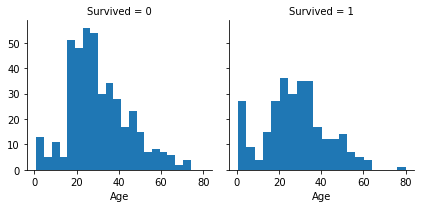

In [21]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

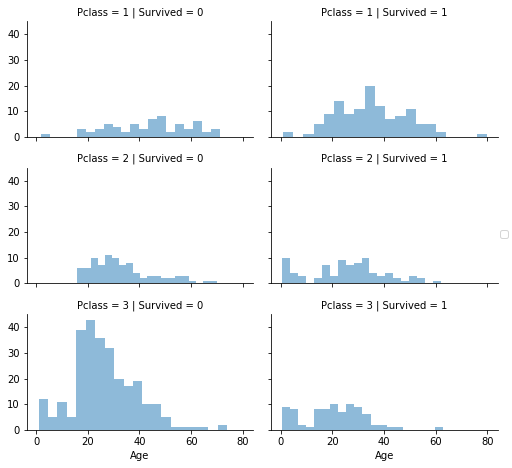

In [22]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

## Based on survival rate varies based on Age and class. So both features need to consider 

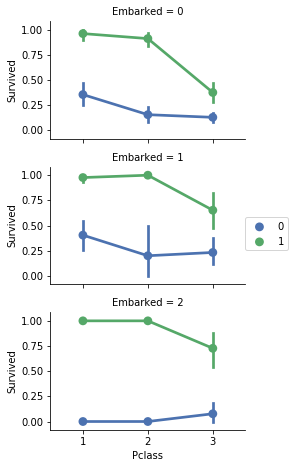

In [23]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

## We can drop few more unnecessary features

In [24]:
train_df = train_df.drop(['Ticket','Cabin'],axis = 1)
test_df = test_df.drop(['Ticket','Cabin'],axis = 1)

In [25]:
average_age_titanic   = train_df["Age"].mean()
std_age_titanic       = train_df["Age"].std()
count_nan_age_titanic = train_df["Age"].isnull().sum()
rand= np.random.randint(average_age_titanic-std_age_titanic,average_age_titanic+std_age_titanic,count_nan_age_titanic)
train_df["Age"][np.isnan(train_df["Age"])] = rand

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
# Normalising the data for missing AGE values. 

average_age_titanic   = test_df["Age"].mean()
std_age_titanic       = test_df["Age"].std()
count_nan_age_titanic = test_df["Age"].isnull().sum()
rand1= np.random.randint(average_age_titanic-std_age_titanic,average_age_titanic+std_age_titanic,count_nan_age_titanic)
test_df["Age"][np.isnan(test_df["Age"])] = rand1

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
train_df['Age'] = train_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)

In [28]:
train_df.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,0,22,0,1
1,1,1,1,38,1,1
2,1,3,1,26,0,0
3,1,1,1,35,0,1
4,0,3,0,35,0,0


In [29]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Embarked,Family
0,892,3,0,34,2,0
1,893,3,1,47,0,1
2,894,2,0,62,2,0
3,895,3,0,27,0,0
4,896,3,1,22,0,1


## Now we have all the data in numerical form , and only few features which are important to find survival rate. So we can step into Model predictions

## Model 

In [30]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [31]:
Y_train = train_df['Survived']
X_train = train_df.drop(['Survived'],axis = 1)

## Let's see which model fits best for our training data in the first step. Spliting training data into train and test data. We are not going to touch the provided original test dataset until we find which model is good

In [32]:
train_x,test_x,train_y,test_y =  train_test_split(X_train,Y_train,random_state = 3, stratify = Y_train)

In [33]:
models = []
models.append(('logistic', LogisticRegression()))
models.append(('Gaussian', GaussianNB()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
names = []

In [34]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=2)
    cv_results = model_selection.cross_val_score(model, train_x, train_y, cv=kfold, scoring='accuracy')
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

logistic: 0.775328 (0.046432)
Gaussian: 0.758955 (0.040441)
DecisionTree: 0.745409 (0.048707)
RandomForest: 0.748462 (0.040830)
KNN: 0.736431 (0.040854)
SVM: 0.763410 (0.060661)


## Random Forest Classifier

In [47]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(train_x, train_y)

Y_pred = random_forest.predict(test_x)

In [48]:
#Accuracy score for Random Forest Classifier
accuracy_score(test_y,Y_pred)

0.8385650224215246

In [49]:
#Confusion Matrix for Random Forest Classifier
confusion_matrix(test_y,Y_pred)

array([[116,  21],
       [ 15,  71]])

## Logistic Regression

In [50]:
logicR = LogisticRegression()

logicR.fit(train_x, train_y)

Y_pred1 = logicR.predict(test_x)

In [51]:
# Logistic regression accuracy score
accuracy_score(test_y,Y_pred1)

0.8565022421524664

In [52]:
# Confusion matrix for Logistic Regression
confusion_matrix(test_y,Y_pred1)

array([[123,  14],
       [ 18,  68]])

## Gaussian Naive Bay 

In [53]:
GNB = GaussianNB()

GNB.fit(train_x, train_y)

Y_pred2 = GNB.predict(test_x)

In [54]:
# Accuracy score for Gaussian Naive Bay model
accuracy_score(test_y,Y_pred2)

0.8565022421524664

In [55]:
# Confusion matrix for Gaussian Naive Bay
confusion_matrix(test_y,Y_pred2)

array([[119,  18],
       [ 14,  72]])

## Decision Tree Classifier

In [56]:
dtc = DecisionTreeClassifier()

dtc.fit(train_x, train_y)

Y_pred3 = dtc.predict(test_x)

In [57]:
# Accuracy score for Decision Tree Classifier
accuracy_score(test_y,Y_pred3)

0.8430493273542601

In [58]:
# confusion matrix for Decision Tree Classifier
confusion_matrix(test_y,Y_pred3)

array([[120,  17],
       [ 18,  68]])

## Based on above analysis Logistic Regression model doing well  with 86% accuracy

In [59]:
# Original test dataset
X_test = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 5), (891,), (418, 5))

In [61]:
log_reg = LogisticRegression()

log_reg.fit(X_train, Y_train)

Pred_Y = log_reg.predict(X_test)

In [62]:
# For submitting the Titanic survival prediction which obtained for test data
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Pred_Y
    })

In [63]:
submission.to_csv('Titanic_submission.csv', index=False)

## Looking forward to learn more from the community feedback. Any suggestions to improve my score are most welcome. Thanks !!!